In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.decomposition import PCA

In [7]:
data1= pd.read_excel("HW_Data_Set.xlsx")
data = data1.copy()
data = data.replace('?',np.nan)
data = data.dropna()
dummy = pd.get_dummies(data[["ind_109"]])
y = data["90_target"]
X_= data.drop(["ind_109","50_target","90_target","20_target", "ind_420", "ind_422"],axis=1).astype('float64')
X = pd.concat([X_,dummy[["ind_109_GREEN"]]],axis=1)
X.head(),

(   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
 0   19.0   17.0  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
 1   24.0   19.0  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
 2   30.0   24.0  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
 3   37.0   30.0  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
 4   41.0   37.0  100.0  57.142857  42.857143  81.603007  76.455495   14.90   
 
    ind_15  ind_16  ...  ind_407  ind_410   ind_412  ind_414  ind_416  ind_418  \
 0   17.62   11.73  ...    -23.0    -27.0  0.002371      2.0    -49.6    -54.0   
 1   18.16   12.22  ...    -16.0    -31.0  0.003074      0.8    -55.6    -60.0   
 2   17.86   12.28  ...    -10.0    -30.0  0.003561      2.7    -58.4    -60.0   
 3   14.76   12.61  ...    -10.0    -30.0  0.004366      0.9    -61.8    -65.0   
 4   11.92   14.25  ...    -24.0    -45.0  0.004198      0.1    -79.8    -86.0   
 
    ind_424   ind_426   ind_42

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [9]:
pca =PCA()
X_reduced= pca.fit_transform(scale(X))

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
k_fit = kmeans.fit(X_reduced)

In [12]:
k_fit.n_clusters

4

In [13]:
k_fit.cluster_centers_

array([[ 1.97721238e+00, -3.11428818e+00, -8.29250822e-01,
        -4.74509235e-01,  3.76226690e-01,  2.10527970e-01,
        -1.37336256e-01, -1.79060245e-01, -8.25952127e-02,
        -3.17470395e-01,  4.96950576e-02, -7.98963101e-02,
        -1.02999300e-01, -2.88518504e-02,  2.05177682e-01,
        -2.37679134e-01, -2.92481874e-01, -1.14000705e-01,
         5.83929441e-02,  4.10736674e-02,  2.87416777e-02,
        -5.12672630e-02,  1.02124494e-01, -1.02871779e-01,
        -1.02789042e-01,  1.97411993e-01,  2.37666426e-01,
        -7.37476322e-03, -5.74235420e-02, -1.02726308e-01,
        -1.22642404e-01, -6.18646565e-02,  3.30989834e-03,
         3.07853085e-02, -2.49240664e-02, -4.02123974e-03,
        -3.86786283e-02, -1.23237065e-02, -6.69584512e-03,
        -3.23723564e-03,  3.13711044e-02,  4.43472409e-02,
        -4.53421043e-02, -1.62290649e-02, -2.26398414e-02,
        -3.19189907e-04, -2.33503784e-02,  1.39560283e-02,
        -2.32025695e-03,  5.17527825e-04,  2.36201374e-0

In [14]:
k_fit.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(X_reduced)

In [16]:
kumeler = k_fit.labels_

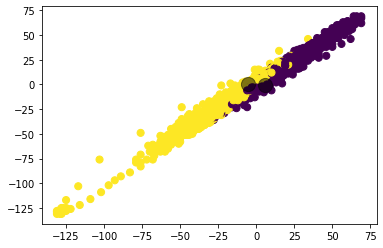

In [17]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kumeler,s=50,cmap="viridis")
merkezler=k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5)

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
!pip install --upgrade matplotlib

  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Erişim engellendi: 'c:\\users\\msaka\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [20]:
import mpl_toolkits